In [1]:
import numpy as np
import matplotlib.pyplot as plt
import autokeras as ak
import tensorflow as tf
import os

In [2]:
data = np.load('/home/ML4NO/Data/n1000000_0910_all_flat.npz')

In [3]:
data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])
target = data['delta']

x_train = data_all[:10000]
y_train = target[:10000]

x_train2 = data_all[10000:900000]
y_train2 = target[10000:900000]

x_test = data_all[900000:]
y_test = target[900000:]

In [ ]:
clf = ak.StructuredDataRegressor(overwrite=True, max_trials=50)
clf.fit(x_train, y_train,
           validation_split = 0.1,
           batch_size=64,
           epochs=20,
           verbose=1,
           shuffle = True
       )

Trial 16 Complete [00h 00m 54s]
val_loss: 1654.4722900390625

Best val_loss So Far: 711.20361328125
Total elapsed time: 00h 14m 17s

Search: Running Trial #17

Hyperparameter    |Value             |Best Value So Far 
structured_data...|True              |True              
structured_data...|False             |False             
structured_data...|2                 |2                 
structured_data...|32                |32                
structured_data...|0                 |0                 
structured_data...|256               |256               
regression_head...|0                 |0                 
optimizer         |sgd               |adam              
learning_rate     |0.001             |0.001             
structured_data...|64                |64                



In [15]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 264)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 264)               0         
_________________________________________________________________
normalization (Normalization (None, 264)               529       
_________________________________________________________________
dense (Dense)                (None, 256)               67840     
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128)               0     

In [16]:
model.evaluate(x_test, y_test)

3125/3125 [==============================] - 30s 9ms/step - loss: 225.3581 - mean_squared_error: 225.3581


[225.35812377929688, 225.35812377929688]

In [17]:
model.fit(x_train2, y_train2,
           validation_split = 0.1,
           batch_size=64,
           epochs=20,
           verbose=1,
           shuffle = True
         )

Epoch 1/20
12516/12516 [==============================] - 199s 16ms/step - loss: 234.3995 - mean_squared_error: 234.3995 - val_loss: 145.6397 - val_mean_squared_error: 145.6397
Epoch 2/20
12516/12516 [==============================] - 197s 16ms/step - loss: 141.7181 - mean_squared_error: 141.7181 - val_loss: 145.6397 - val_mean_squared_error: 145.6397
Epoch 3/20
12516/12516 [==============================] - 200s 16ms/step - loss: 141.7175 - mean_squared_error: 141.7175 - val_loss: 145.6397 - val_mean_squared_error: 145.6397
Epoch 4/20
12516/12516 [==============================] - 200s 16ms/step - loss: 141.7177 - mean_squared_error: 141.7177 - val_loss: 145.6397 - val_mean_squared_error: 145.6397
Epoch 5/20
12516/12516 [==============================] - 197s 16ms/step - loss: 141.7173 - mean_squared_error: 141.7173 - val_loss: 145.6397 - val_mean_squared_error: 145.6397
Epoch 6/20
12516/12516 [==============================] - 200s 16ms/step - loss: 141.7180 - mean_squared_error: 141

In [19]:
model.evaluate(x_test, y_test)
pre_test = model.predict(x_test)

3125/3125 [==============================] - 30s 10ms/step - loss: 160.3534 - mean_squared_error: 160.3534


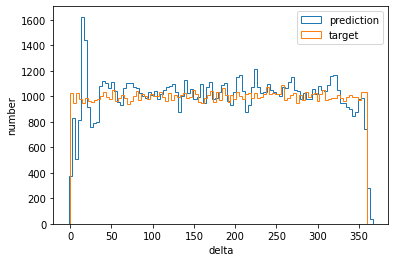

In [20]:
plt.hist(pre_test, histtype = 'step', bins = 100, label = 'prediction')
plt.hist(y_test, histtype = 'step', bins = 100, label = 'target')
plt.xlabel('delta')
plt.ylabel('number')
plt.legend()
plt.show()

Text(0.5, 1.0, 'delta')

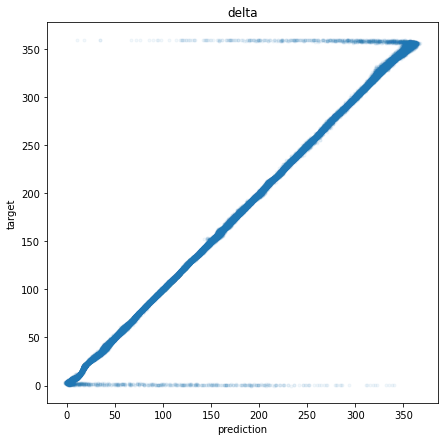

In [21]:
plt.figure(figsize=(7,7))
plt.plot(pre_test, y_test, '.', alpha = 0.05)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('delta')

In [22]:
index = 1
while os.path.isfile('/home/ML4NO/ML_DUNE/Regression/models/0910_delta_{}.h5'.format(index)):
    index += 1
model.save('/home/ML4NO/ML_DUNE/Regression/models/0910_delta_{}.h5'.format(index))